# Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. We have to predict the rings of each abalone which will lead us to the age of that abalone

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [4]:
df.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2565,I,0.45,0.35,0.12,0.468,0.2005,0.1065,0.1325,8


In [5]:
df.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
# cheacking the no. of rows and columns

df.shape

(4177, 9)

In [7]:
#cheacking the datatype

df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [9]:
#cheacking the null values

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
#Exploring the data variable

df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

Target variable is discrete and categorical in nature.

Number of Rings ranges from 1 to 27.

In [11]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [12]:
def labels(x):
    
    if x<=10:
        return 'young'
    if x<=20:
        return 'middle_age'
    if x<=30:
        return 'old'
df['Rings']=df['Rings'].apply(labels)


Remarks: We have converted target column into bins because most of the values was having less then 10 count so it will be hard for model to predict those value

<AxesSubplot:>

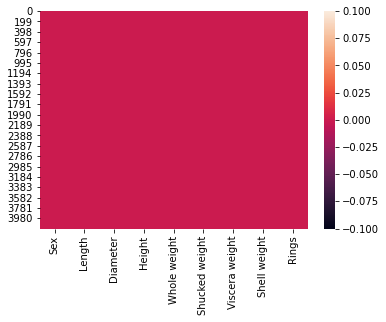

In [13]:
#heatmap for nullvalues

sns.heatmap(df.isnull())

# Let's do some plotting to know how the data columns are distributed in the dataset

In [14]:
df.head(1)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,middle_age


<AxesSubplot:xlabel='Sex', ylabel='count'>

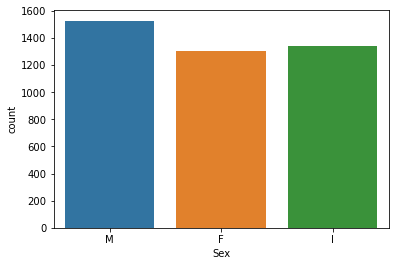

In [15]:
#countplot for Sex column

sns.countplot(df.Sex)

In [16]:
#No.of values in Sex

print(df.Sex.value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


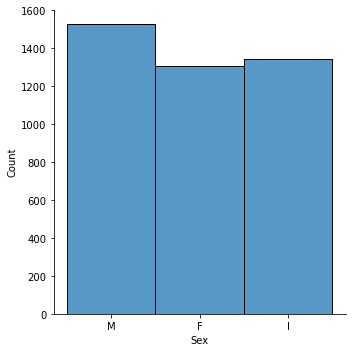

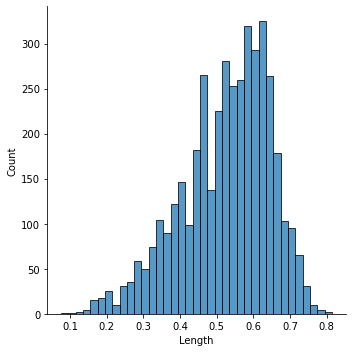

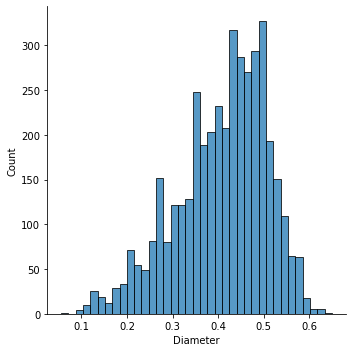

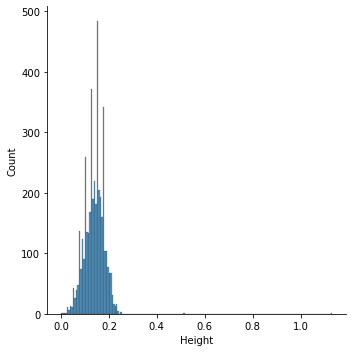

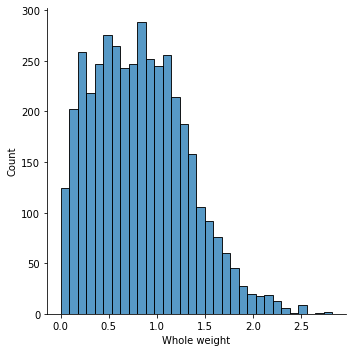

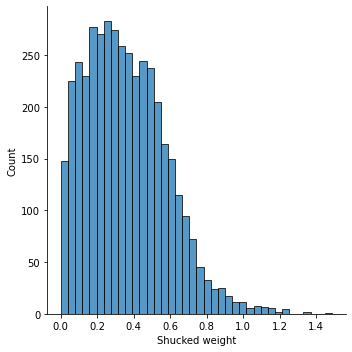

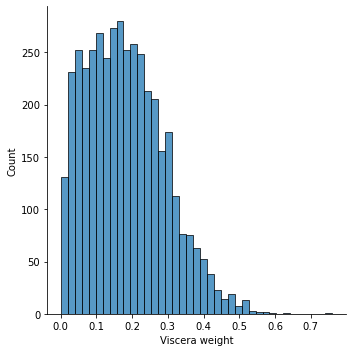

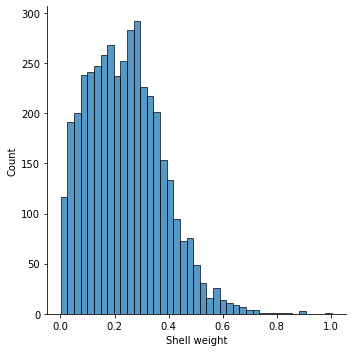

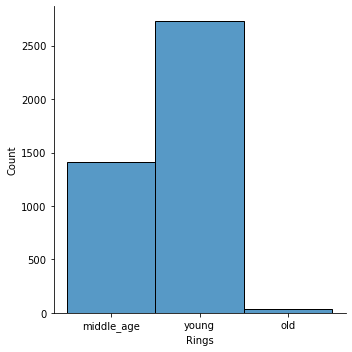

In [17]:
# displot for all columns

for i in df.columns:
    sns.displot(df[i])

# Unvirate analysis


<AxesSubplot:xlabel='Length', ylabel='Density'>

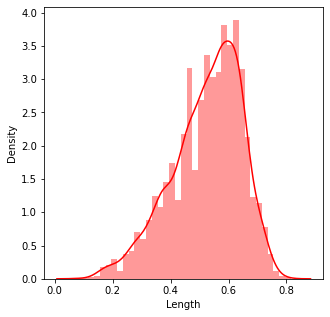

In [109]:
#skewness is present in length column
plt.figure(figsize=(5,5))
sns.distplot(df['Length'],color='red')

<AxesSubplot:xlabel='Height', ylabel='Density'>

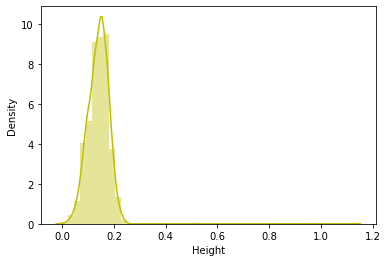

In [19]:
sns.distplot(df['Height'],color='y')

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

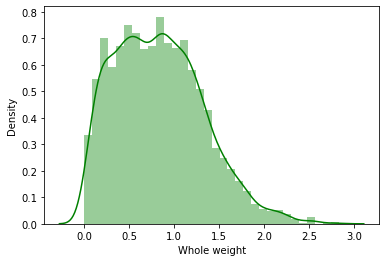

In [20]:
#some skewness are present

sns.distplot(df['Whole weight'],color='g')

<AxesSubplot:xlabel='Shell weight'>

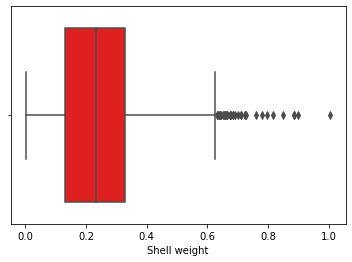

In [21]:
#outliers are present 

sns.boxplot(df['Shell weight'],color='red')

<AxesSubplot:xlabel='Whole weight'>

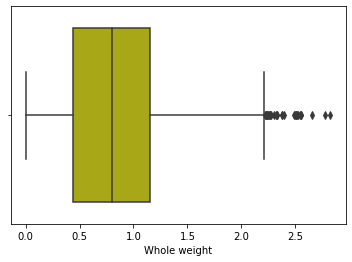

In [22]:
sns.boxplot(df['Whole weight'],color='y')

<AxesSubplot:xlabel='Viscera weight'>

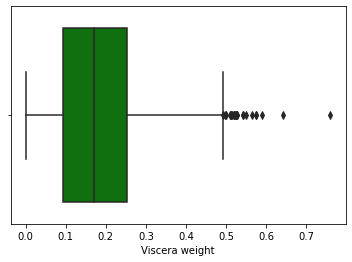

In [23]:
sns.boxplot(df['Viscera weight'],color='g')

<AxesSubplot:xlabel='Shell weight'>

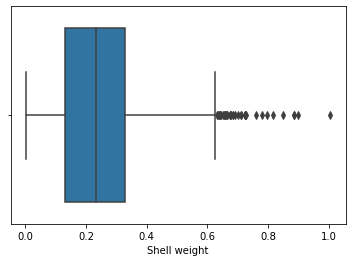

In [24]:
sns.boxplot(df['Shell weight'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

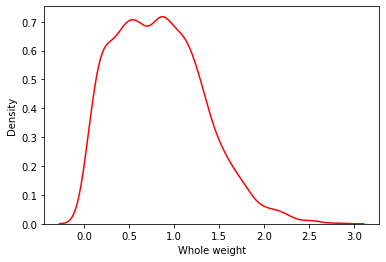

In [25]:
sns.kdeplot(df['Whole weight'],color='red')

# Byvarite Analysis

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

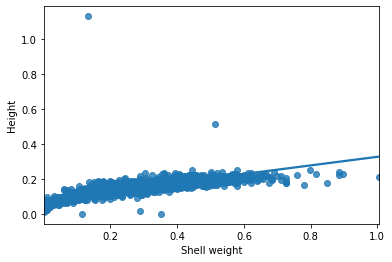

In [26]:
sns.regplot(x='Shell weight',y='Height',data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

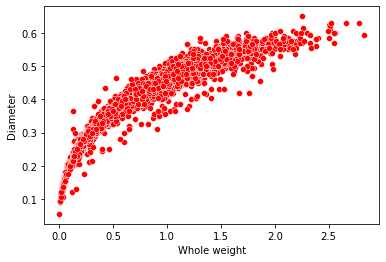

In [27]:
# when whole weight is increasing Diameter is also incrersing

sns.scatterplot(x='Whole weight',y='Diameter',data=df,color='red')

<AxesSubplot:xlabel='Shell weight', ylabel='Diameter'>

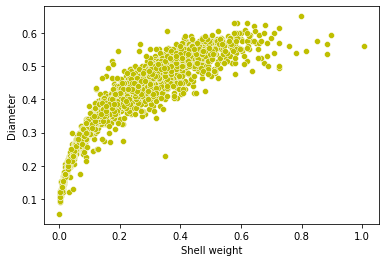

In [28]:
sns.scatterplot(y='Diameter',x='Shell weight',data=df,color='y')

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

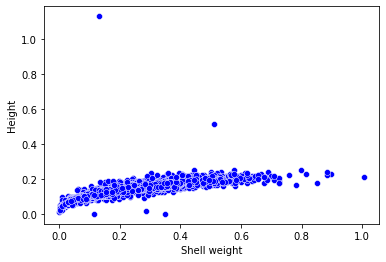

In [29]:
# when Shell weight increase Height also increase

sns.scatterplot(x='Shell weight',y='Height',data=df,color='b')

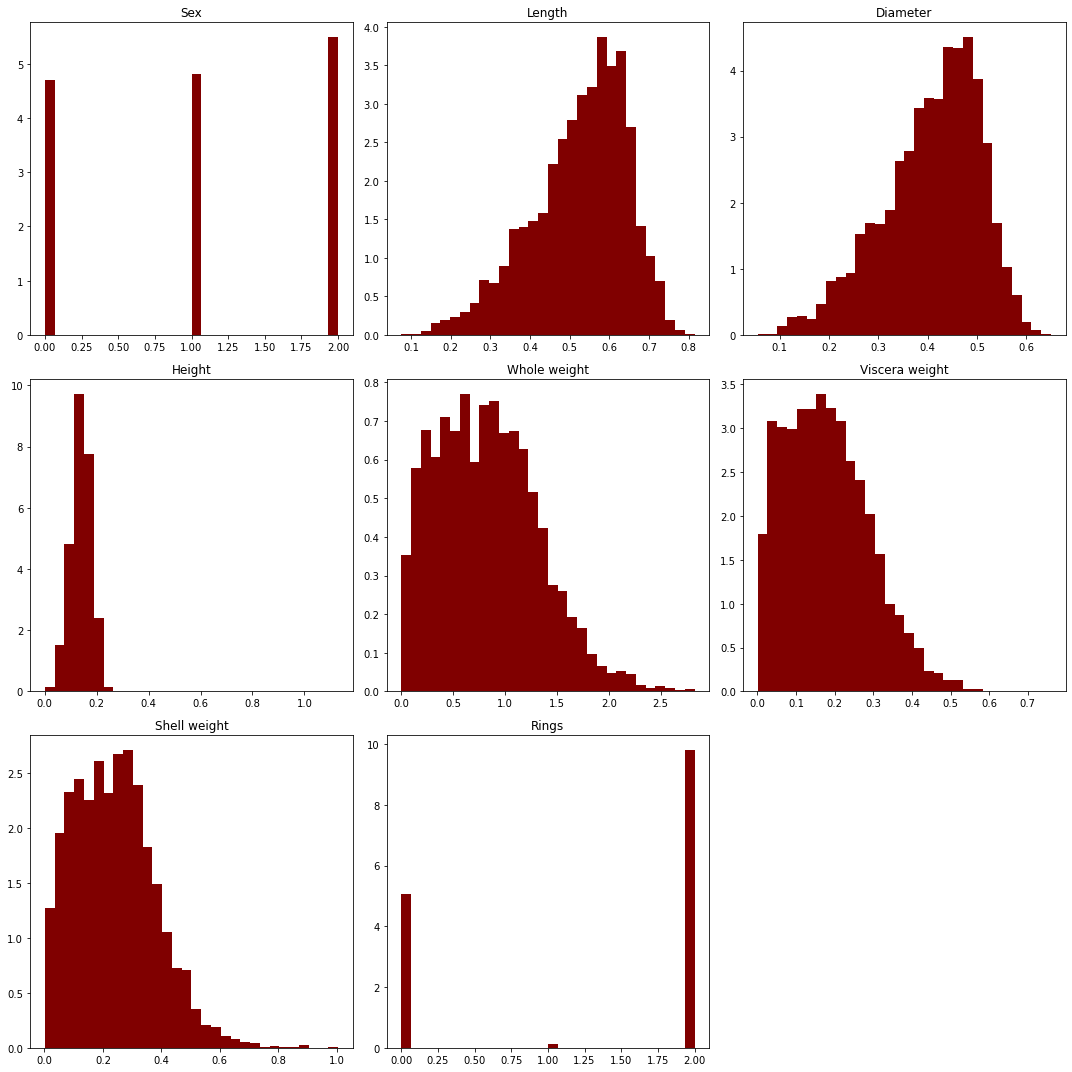

In [103]:
#Histogram

plt.rcParams['figure.figsize'] = (15,15)
df.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=False)
plt.tight_layout()
plt.show()

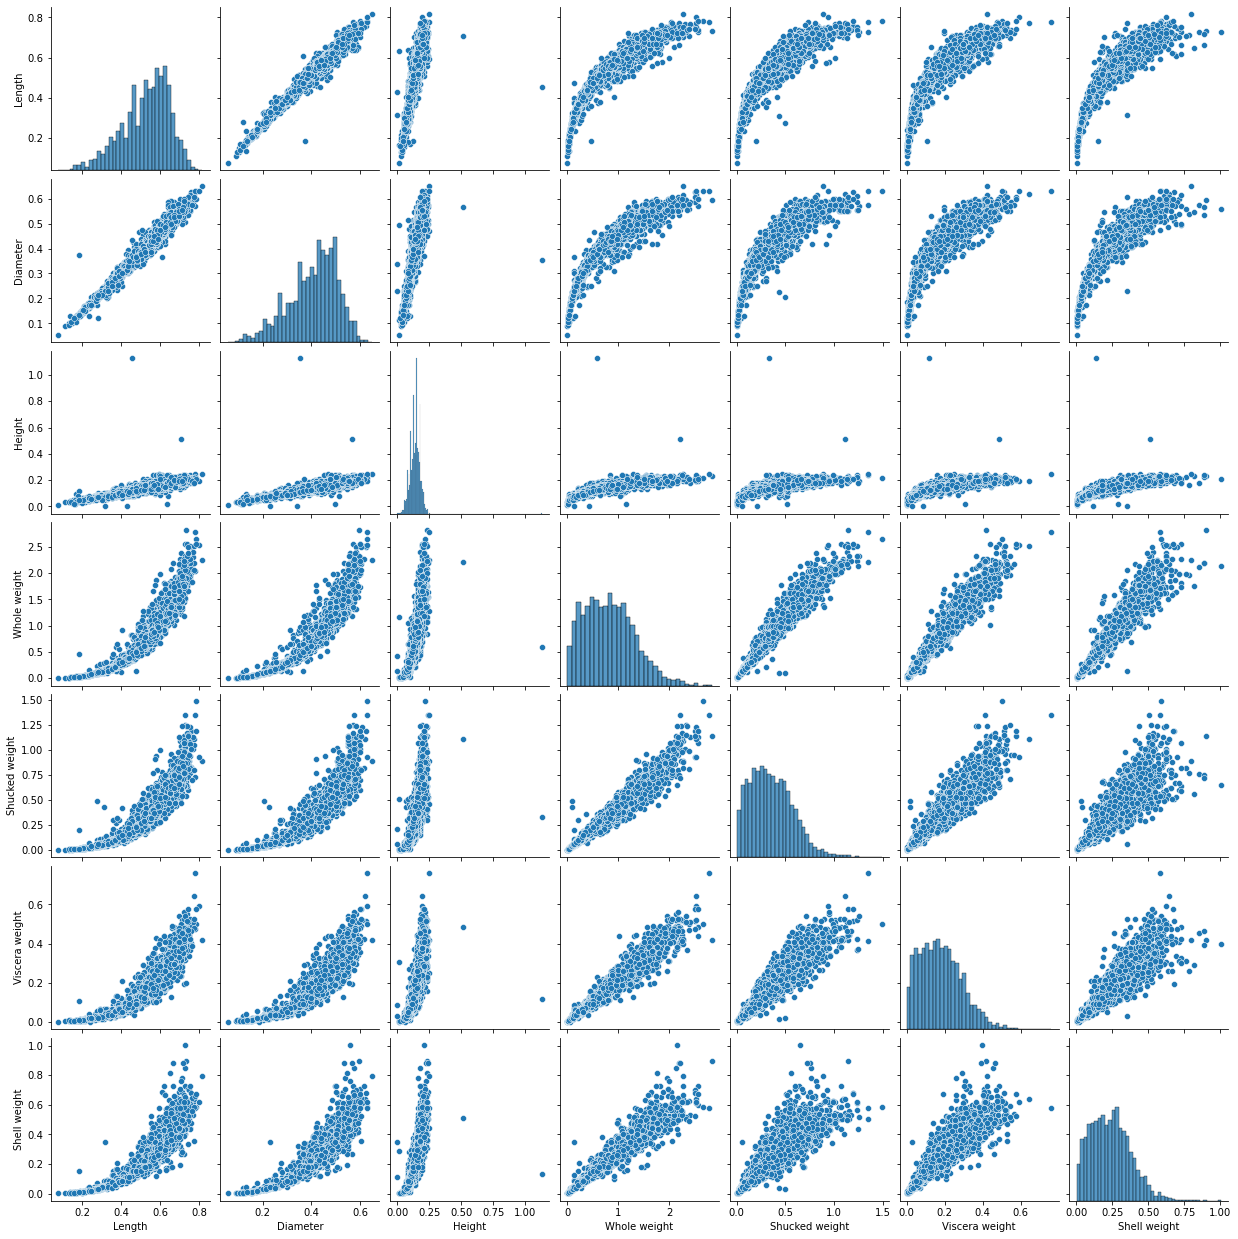

In [31]:
#pair plot

sns.pairplot(df)

# Feature Engineering

Encoding Categorical features into ordinal numerical value

In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
def ordinal_encoder(df,column):
    df[column]=oe.fit_transform(df[column])
    return df

In [33]:
ordinal_column=['Sex','Rings']
df=ordinal_encoder(df,ordinal_column)

In [34]:
# pre-processing the data

def preprocessing(df):
    df=df.copy()
    df=ordinal_encoder(df,['Sex'])
    return df

In [35]:
df=preprocessing(df)

In [36]:
df['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

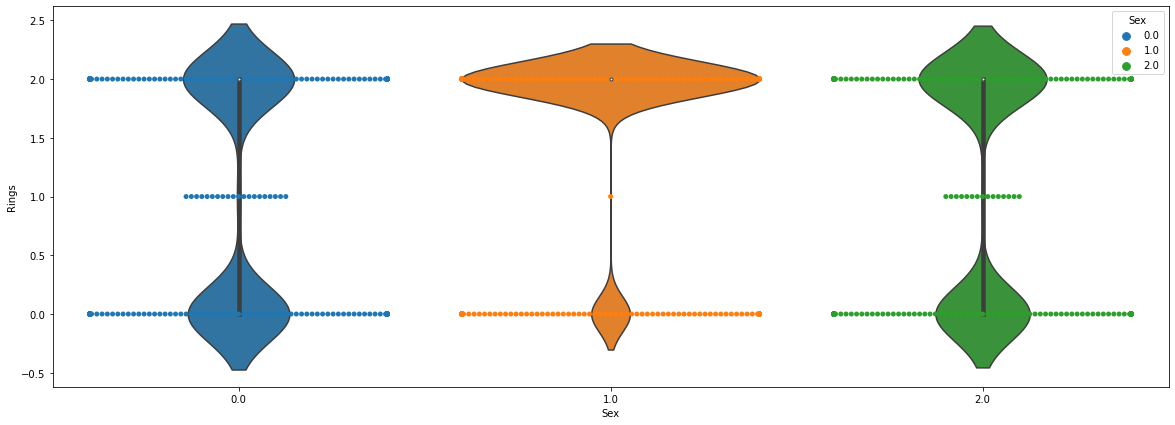

In [37]:
#Sex and Rings Visulization

plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Rings', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Rings', data = df)

In [45]:
from imblearn.over_sampling import SMOTE

smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [39]:
# statistical summary of Dataset

df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,1.315777
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.944394
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,2.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,2.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,2.000000


# Observation---

mean of height columns is greater than median hence it is right skewed . similar with whole weight. standard deviation is heigh in whole weight,shucked weight. it means data spread is high

<AxesSubplot:>

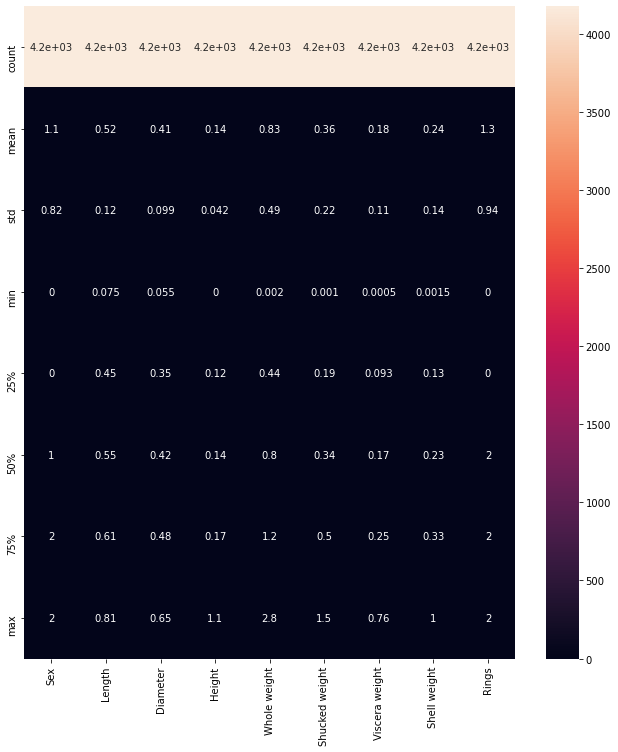

In [40]:
plt.figure(figsize=(11,12))
sns.heatmap(df.describe(),annot=True)

In [41]:
#now cheaking the corelation

df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,0.031521
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,-0.403108
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,-0.420410
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,-0.413908
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,-0.433438
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,-0.342275
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,-0.414224
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,-0.492458
Rings,0.031521,-0.403108,-0.420410,-0.413908,-0.433438,-0.342275,-0.414224,-0.492458,1.000000


<AxesSubplot:>

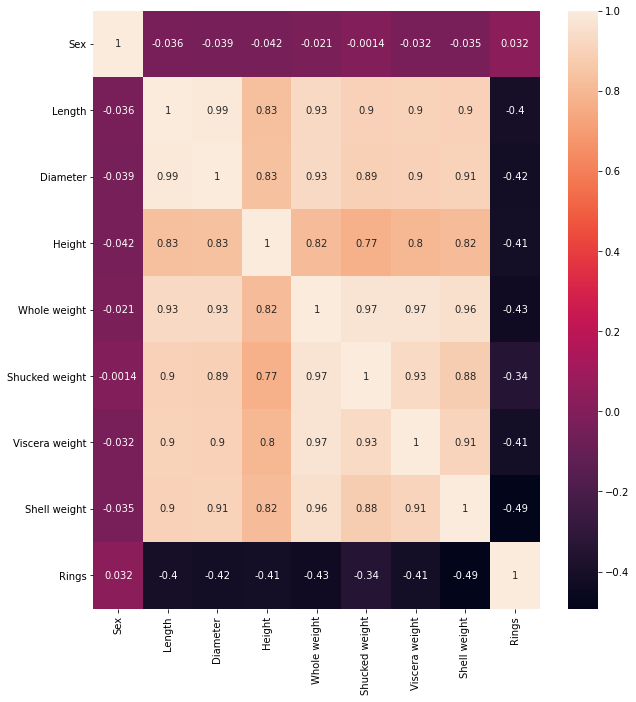

In [42]:
plt.figure(figsize=(10,11))

sns.heatmap(df.corr(),annot=True)

In [43]:
x=df.iloc[:,0:-1]
x.shape


(4177, 8)

In [44]:
y=df.iloc[:,-1]
y.shape

(4177,)

In [46]:
corr_=df.corr()
corr_['Rings'].sort_values(ascending=False)
                          

Rings             1.000000
Sex               0.031521
Shucked weight   -0.342275
Length           -0.403108
Height           -0.413908
Viscera weight   -0.414224
Diameter         -0.420410
Whole weight     -0.433438
Shell weight     -0.492458
Name: Rings, dtype: float64

In [47]:
#vif for cheaking the corelation
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['feature']=x.columns
    print(vif)

In [48]:
vif_calc()

   VIF Factor         feature
0    2.555356             Sex
1  700.488988          Length
2  749.121626        Diameter
3   42.128924          Height
4  421.652484    Whole weight
5  101.674946  Shucked weight
6   63.585627  Viscera weight
7   81.873737    Shell weight


# Data cleaings
featur engineering---selection of feature/variables/columns

detecting outliers

In [49]:
df.drop(['Shucked weight'],axis=1,inplace=True)
df

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.1010,0.1500,0.0
1,2.0,0.350,0.265,0.090,0.2255,0.0485,0.0700,2.0
2,0.0,0.530,0.420,0.135,0.6770,0.1415,0.2100,2.0
3,2.0,0.440,0.365,0.125,0.5160,0.1140,0.1550,2.0
4,1.0,0.330,0.255,0.080,0.2050,0.0395,0.0550,2.0
...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.2390,0.2490,0.0
4173,2.0,0.590,0.440,0.135,0.9660,0.2145,0.2605,2.0
4174,2.0,0.600,0.475,0.205,1.1760,0.2875,0.3080,2.0
4175,0.0,0.625,0.485,0.150,1.0945,0.2610,0.2960,2.0


Sex                  AxesSubplot(0.125,0.536818;0.168478x0.343182)
Length            AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Whole weight            AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

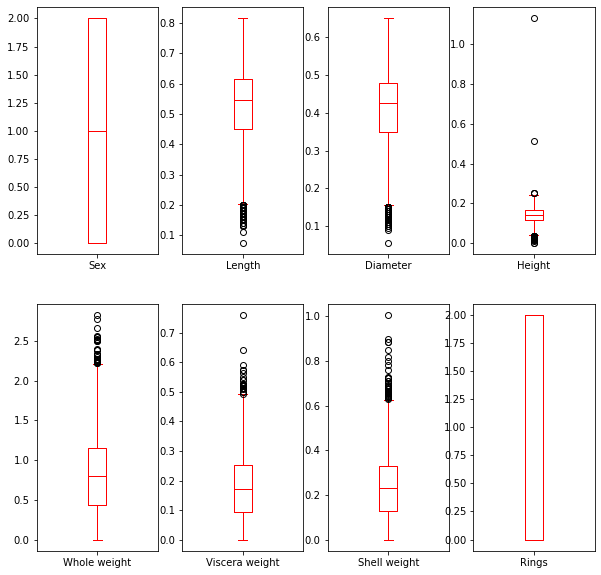

In [50]:
#Cheaking outliers

df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10),color='red')

In [51]:
#Removing the outliers

for col in x.columns:
  percentile=x[col].quantile([0.01,0.98]).values
  x[col][x[col] <=percentile[0]] = percentile[0]
  x[col][x[col] >=percentile[1]] = percentile[1]

<AxesSubplot:xlabel='variable', ylabel='value'>

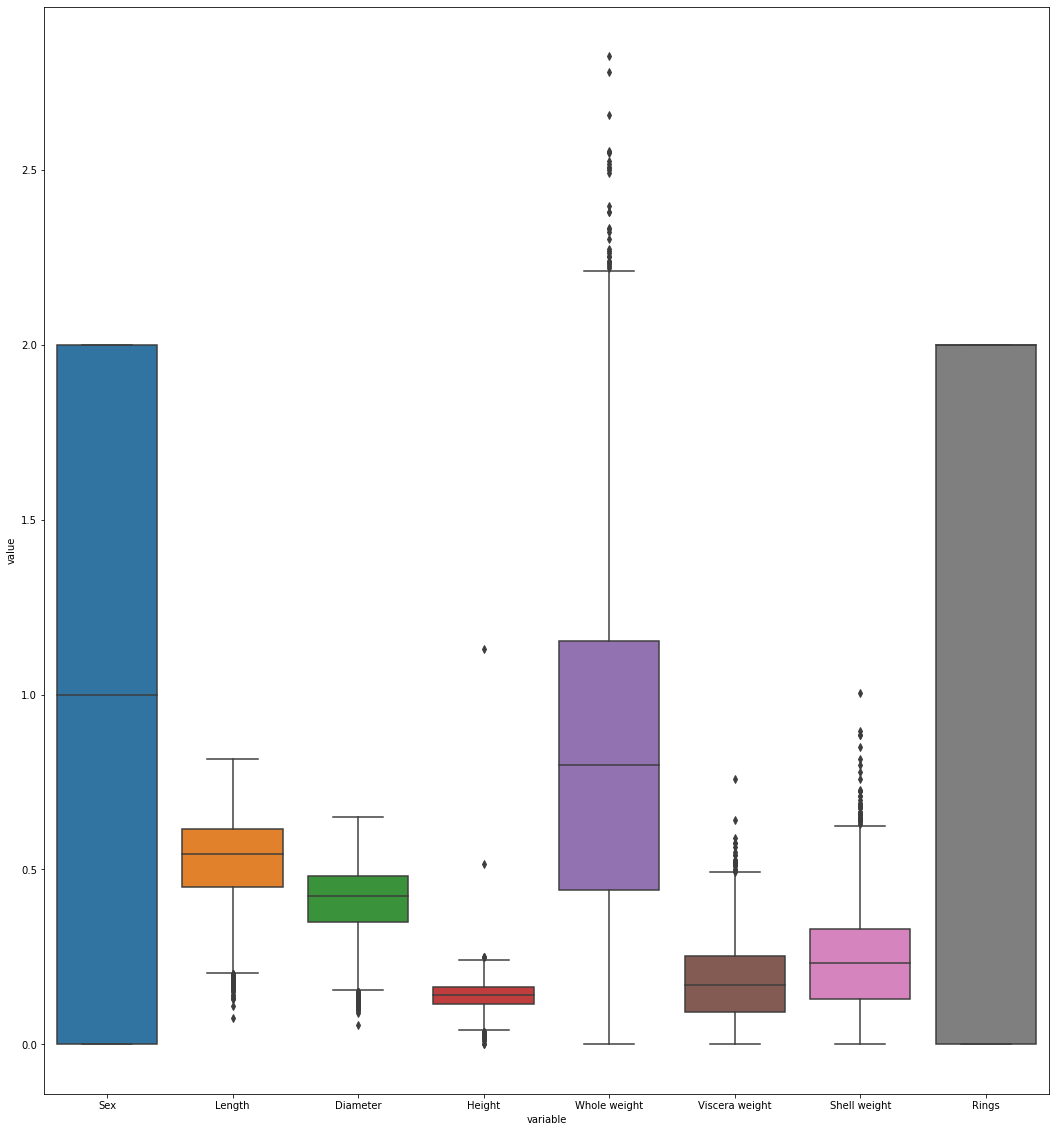

In [52]:
plt.figure(figsize=(18,20))
sns.boxplot(x='variable',y='value',data=pd.melt(df))

In [53]:
#checking the skewness

x.skew()

Sex              -0.098155
Length           -0.629471
Diameter         -0.607930
Height           -0.260146
Whole weight      0.374051
Shucked weight    0.462861
Viscera weight    0.424164
Shell weight      0.370577
dtype: float64

In [56]:
#REmoving hte Skewness

from sklearn.preprocessing import power_transform


In [57]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.12707158, -0.69759929, -0.56141442, ..., -0.55747515,
        -0.70431958, -0.60521562],
       [ 1.12707158, -1.40645463, -1.39632815, ..., -1.3103559 ,
        -1.33168942, -1.32986107],
       [-1.30793479, -0.07614953,  0.00384465, ..., -0.38344273,
        -0.26789167, -0.11606879],
       ...,
       [ 1.12707158,  0.60235338,  0.65513669, ...,  0.85112558,
         1.0335041 ,  0.59935372],
       [-1.30793479,  0.86973341,  0.78350172, ...,  0.87284104,
         0.82435871,  0.5167476 ],
       [ 1.12707158,  1.88632046,  1.77497822, ...,  2.07232937,
         1.66501366,  1.7378814 ]])

In [62]:
# Now scaling the data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [63]:
x=ss.fit_transform(x)
x

array([[ 1.15198011, -0.58153588, -0.4362409 , ..., -0.61928042,
        -0.73729201, -0.65005964],
       [ 1.15198011, -1.46785949, -1.45646893, ..., -1.20543177,
        -1.2300927 , -1.24624052],
       [-1.28068972,  0.05155241,  0.12488451, ..., -0.46922567,
        -0.35713147, -0.20292398],
       ...,
       [ 1.15198011,  0.64243482,  0.68600992, ...,  0.79217204,
         1.01332381,  0.5273976 ],
       [-1.28068972,  0.85346425,  0.78803272, ...,  0.8179627 ,
         0.76457679,  0.43797047],
       [ 1.15198011,  1.57096431,  1.50219234, ...,  2.49895099,
         1.84873833,  1.92097041]])

# Sampling the Data

In [54]:
from imblearn.over_sampling import SMOTE

smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)


In [61]:
y_train.value_counts()

0.0    2730
1.0    2730
2.0    2730
Name: Rings, dtype: int64

# Train test split
Dividing the data in to train and test sets

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [65]:
x_train.shape

(2923, 8)

In [66]:
x_test.shape

(1254, 8)

In [67]:
y_train.shape

(2923,)

In [68]:
y_test.shape

(1254,)

# Model-1

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


model=[LogisticRegression(),
KNeighborsClassifier(),DecisionTreeClassifier(),
RandomForestClassifier(),AdaBoostClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Accuracy Score LogisticRegression() is :
0.7695374800637959
[[231   0 172]
 [ 11   0   0]
 [106   0 734]]
              precision    recall  f1-score   support

         0.0       0.66      0.57      0.62       403
         1.0       0.00      0.00      0.00        11
         2.0       0.81      0.87      0.84       840

    accuracy                           0.77      1254
   macro avg       0.49      0.48      0.49      1254
weighted avg       0.76      0.77      0.76      1254

Accuracy Score KNeighborsClassifier() is :
0.7639553429027113
[[243   0 160]
 [ 10   0   1]
 [125   0 715]]
              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62       403
         1.0       0.00      0.00      0.00        11
         2.0       0.82      0.85      0.83       840

    accuracy                           0.76      1254
   macro avg       0.49      0.48      0.49      1254
weighted avg       0.75      0.76      0.76      1254

Accuracy Score DecisionT

# Cross Validation

for checking the overfitting

In [72]:
from sklearn.model_selection import cross_val_score
lg=LogisticRegression()
cv=cross_val_score(lg,x,y,cv=5)
print('cross validaiton sccore for logistic model:',cv.mean())

cross validaiton sccore for logistic model: 0.7711245451680371


In [77]:
dt=DecisionTreeClassifier()
cv=cross_val_score(dt,x,y,cv=5)
print('cross val score for DecisionTree model:',cv.mean())

cross val score for DecisionTree model: 0.6906816033005759


In [78]:
rfc=RandomForestClassifier()

In [79]:
cv=cross_val_score(rfc,x,y,cv=5)
print('cross validation for RamdomForestClassifier Model:',cv.mean())

cross validation for RamdomForestClassifier Model: 0.7637059851588689


Randomforest is perform better among them all so we will continue with ramdomforest

# Hyper perameter tuning

In [97]:
from sklearn.model_selection import GridSearchCV

#creating the parameters list to pass in GridrsearchCV
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entrophy']}
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}

In [98]:
gcv_pred=gcv.best_estimator_.predict(x_test) #predicting the best parameters
accuracy_score(y_test,gcv_pred) #cheacking the final score

0.7807017543859649

# Saving the Best Model 

In [99]:
import joblib

joblib.dump(gcv.best_estimator_,'Abalone_Model.pkl')

['Abalone_Model.pkl']

Summary:

This was a classification problem where data was totally imbalanced and our target column also having a lot of values that were having only one count and some of the values were having less than 15 count so we converted them into bins,and we did lot of EDA to understand the impact of features on our target column,and if We talk about correlation, we were having high positive correlation.And we achieved 78% accuracy by doing hyperperameter tunning on RandomForest.